## Кластеризация

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data=pd.read_excel('data for clustering.xls')

In [ ]:
data.head()

,target,age,educ,work_exp,interest,coffee,boss_educ,passport,green,floor,children,climate,offhour,dist,salary,heigh,lunch
0,0,50,4,27,8,1.3,1,0,2,3,2,0,0,10.6,1,176,226
1,0,30,3,10,0,0.0,6,1,2,3,0,0,0,11.5,0,186,226
2,0,43,3,22,7,1.9,6,1,1,5,0,3,0,12.8,1,166,238
3,0,58,3,31,7,2.0,4,0,3,3,1,1,0,15.2,1,180,216
4,1,40,3,23,7,0.0,6,1,3,2,0,0,0,16.1,1,180,286


In [ ]:
data.describe()

,target,age,educ,work_exp,interest,coffee,boss_educ,passport,green,floor,children,climate,offhour,dist,salary,heigh,lunch
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,0.320122,41.108740,2.741870,19.360772,5.137195,0.909654,3.819106,0.377033,2.455285,4.945122,1.271341,1.809959,0.494919,12.754065,0.440041,176.913618,253.551829
std,0.466760,12.394227,1.287089,12.485227,2.973344,0.976238,1.501373,0.484890,1.305763,4.468385,1.231393,1.343937,0.500228,4.696912,0.496644,8.215167,56.037621
min,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.300000,0.000000,153.000000,92.000000
25%,0.000000,32.000000,2.000000,9.000000,3.000000,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,10.700000,0.000000,171.000000,217.000000
50%,0.000000,40.500000,3.000000,18.000000,5.000000,0.500000,4.000000,0.000000,2.000000,4.000000,1.000000,2.000000,0.000000,12.200000,0.000000,177.000000,252.000000
75%,1.000000,50.000000,4.000000,28.000000,8.000000,1.800000,5.000000,1.000000,3.000000,6.000000,2.000000,3.000000,1.000000,13.600000,1.000000,182.000000,290.000000
max,1.000000,80.000000,6.000000,61.000000,10.000000,3.600000,7.000000,1.000000,5.000000,29.000000,4.000000,4.000000,1.000000,40.600000,1.000000,198.000000,444.000000


In [ ]:
data.columns

Index(['target', 'age', 'educ', 'work_exp', 'interest', 'coffee', 'boss_educ',
       'passport', 'green', 'floor', 'children', 'climate', 'offhour', 'dist',
       'salary', 'heigh', 'lunch'],
      dtype='object')

* target – сотрудник уволится в следующем году (0-нет, 1-да)
* age - возраст
* educ - образование (1-начальное, 2-среднее, 3 -неоконченное высшее, 4-два и более высших образования, 5-кандидат наук, 6-доктор наук)
* work_exp – стаж работы (лет)
* interest – оценка сотрудником интереса к работе (от 0 до 10)
* coffee - среднее количество чашек кофе, выпиваемых сотрудником за рабочий день
* boss_educ - образование руководителя (1-начальное, 2-среднее, 3 -неоконченное высшее, 4-два и более высших образования, 5-кандидат наук, 6-доктор наук)
* passport - наличие загранпаспорта у сотрудника (1-есть, 0 -нет)
* green - степень озеленения офиса (от 1 до 5)
* floor – этаж работы
* children – количество детей у сотрудника
* climate - удовлетворенность рабочей атмосферой (от 0 до 4)
* offhour – наличие переработок (1-да, 0 -нет)
* dist – расстояние до работы
* salary – удовлетворенность заработной платой (1-да, 0 -нет)
* height - рост сотрудника
* lunch - средняя цена бизнес-ланча в офисе

**Цель кластеризации - разработка мер повышения эффективности сотрудников компании**

### Предварительный анализ данных

Наша задача - найти способ повышения эффективности сотрудников компании. Предварительно построим для них эндогенную классификацию по уровню эффективности. Поскольку эта переменная в явном виде не содержится в данных, оценим с ее помощью пяти других, предположительно связанных переменных. Таким образом, наша задача состоит в поиске оптимального способа непараметрической кластеризации (если бы эффективность была представлена как переменная, была бы возможна параметрическая кластеризация). 1) target. Вероятно, сотрудникам, уволившимся в последующем году, не нравилась их работа, а потому они не были достаточно мотивированы усердно трудиться. 2) educ. Вероятно, люди с образованием или ученой степенью в среднем более трудолюбивы или более сообразительны, за счет чего они и добились своей цели. 3) work_exp. Предполагаем, что для уровня эффективности выполнена возрастающая отдача от масшатаба. 4) interest. Возможно, что сотрудники были неискренни в своих ответах, однако другого способа оценки заинтересованности и вовлеченности нет. 5) dist. Возможно, что для некоторых сотрудников значимо время, за которое они добираются от дома до работы. Чем оно меньше, тем больше сил остается на эффективную деятельность.




In [ ]:
data_clust=data[['target', 'educ', 'work_exp', 'interest', 'dist']]
data_clust.describe()

,target,educ,work_exp,interest,dist
count,984.000000,984.000000,984.000000,984.000000,984.000000
mean,0.320122,2.741870,19.360772,5.137195,12.754065
std,0.466760,1.287089,12.485227,2.973344,4.696912
min,0.000000,0.000000,0.000000,0.000000,1.300000
25%,0.000000,2.000000,9.000000,3.000000,10.700000
50%,0.000000,3.000000,18.000000,5.000000,12.200000
75%,1.000000,4.000000,28.000000,8.000000,13.600000
max,1.000000,6.000000,61.000000,10.000000,40.600000


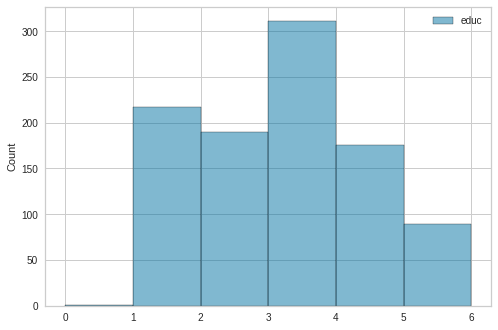

In [ ]:
import seaborn as sns
data_educ=data_clust.drop(columns=['target', 'work_exp', 'interest', 'dist'])
sns.histplot(data_educ, kde=False, bins=6, color='purple')


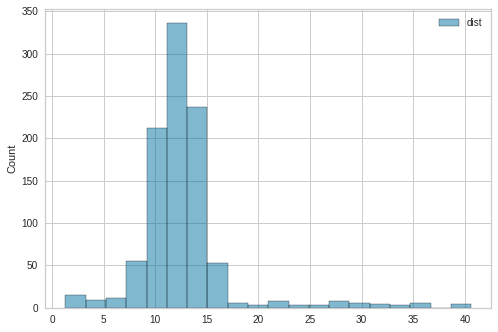

In [ ]:
data_dist=data_clust.drop(columns=['target', 'work_exp', 'interest', 'educ'])
sns.histplot(data_dist, kde=False, bins=20, color='grey')


Восстановленная по гистограмме функция плотности будет обладать сравнительно небольшой дисперсией. Вообще говоря, это не очень хорошо для задания кластерной структуры и разбиения уровня эффективности, однако мы уже выбрали такие переменные)(

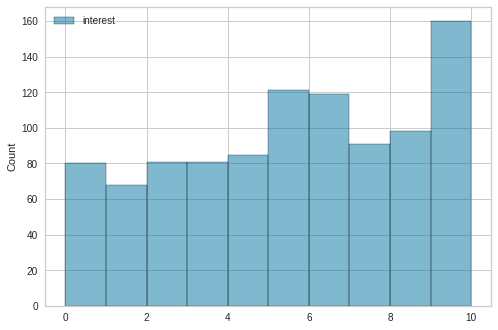

In [ ]:
data_dist=data_clust.drop(columns=['target', 'work_exp', 'dist', 'educ'])
sns.histplot(data_dist, kde=False, bins=10, color='grey')

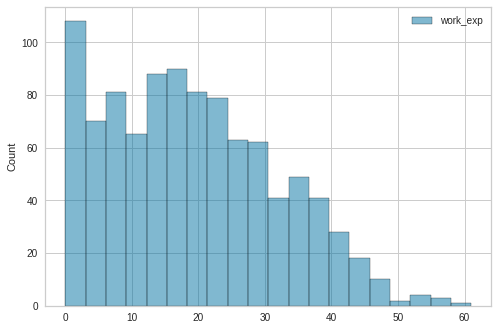

In [ ]:
data_dist=data_clust.drop(columns=['target', 'dist', 'educ', 'interest'])
sns.histplot(data_dist, kde=False, bins=20, color='grey')

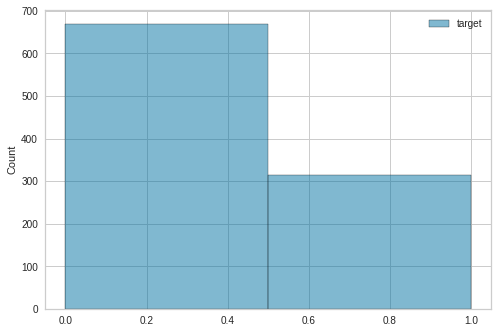

In [ ]:
data_dist=data_clust.drop(columns=['dist', 'educ', 'interest', 'work_exp'])
sns.histplot(data_dist, kde=False, bins=2, color='grey')

In [ ]:
# Обоснование сделанного выбора

In [ ]:
data_clust.corr()

,target,educ,work_exp,interest,dist
target,1.000000,0.046247,0.024676,-0.266240,0.245826
educ,0.046247,1.000000,0.172928,0.111074,-0.065000
work_exp,0.024676,0.172928,1.000000,-0.018489,0.012256
interest,-0.266240,0.111074,-0.018489,1.000000,-0.179107
dist,0.245826,-0.065000,0.012256,-0.179107,1.000000


Наибольшее абсолютное значение коэффициента корреляцию равно 0.27, что соответствует случаю слабой корреляции. Таким образом, избыточные в смысле задачи кластеризации переменные отсутствуют.

### Стандартизация данных методом Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
scaler_standard.fit(data)
data_standard = scaler_standard.transform(data)

In [ ]:
df_std = pd.DataFrame(data_standard, columns = data.columns)

### Стандартизация данных методом MinMax Scaler

In [ ]:
data1=data[['work_exp', 'dist']]

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(data1)
scaled_features = scaler.transform(data1)

In [ ]:
df_MinMax = pd.DataFrame(data = scaled_features, 
columns = ['work_exp', 'dist'])

df_MinMax.head()

,work_exp,dist
0,0.442623,0.236641
1,0.163934,0.259542
2,0.360656,0.292621
3,0.508197,0.353690
4,0.377049,0.376590


In [ ]:
data_mm=pd.concat([data[['educ', 'target','interest']], df_MinMax], axis=1)

In [ ]:
data_mm.head()

,educ,target,interest,work_exp,dist
0,4,0,8,0.442623,0.236641
1,3,0,0,0.163934,0.259542
2,3,0,7,0.360656,0.292621
3,3,0,7,0.508197,0.353690
4,3,1,7,0.377049,0.376590


In [ ]:
# Необходимо, чтобы не было сильно коррелированных показателей

### Выбираем число кластеров

In [ ]:
# Данные только для примера, выбор должен быть другим 
data_clust=data_mm[['work_exp', 'dist','educ', 'target','interest']]

In [ ]:
data_clust.corr()

,work_exp,dist,educ,target,interest
work_exp,1.000000,0.012256,0.172928,0.024676,-0.018489
dist,0.012256,1.000000,-0.065000,0.245826,-0.179107
educ,0.172928,-0.065000,1.000000,0.046247,0.111074
target,0.024676,0.245826,0.046247,1.000000,-0.266240
interest,-0.018489,-0.179107,0.111074,-0.266240,1.000000


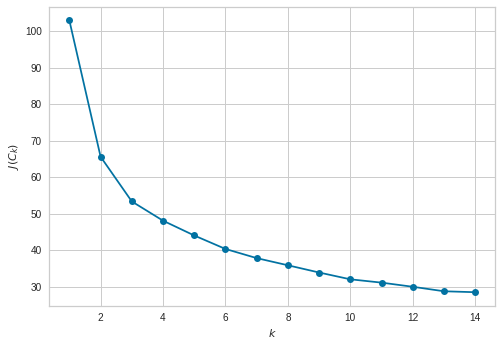

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_clust)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 15), inertia, marker='o');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

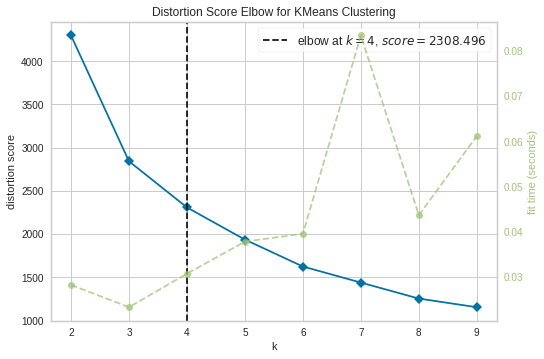

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(data_clust)
visualizer.show()
plt.show()

In [ ]:
# Наша интерпретация и предположение оптимального числа кластеров или диапозона
#Метод локтя выделяет значения 2х или 3х кластеров в качестве оптимальных
#Чтобы полноценно определить количество кластеров, обратимся к дендрограмме, проверив ее деление, когда задается 2 или 3 кластера

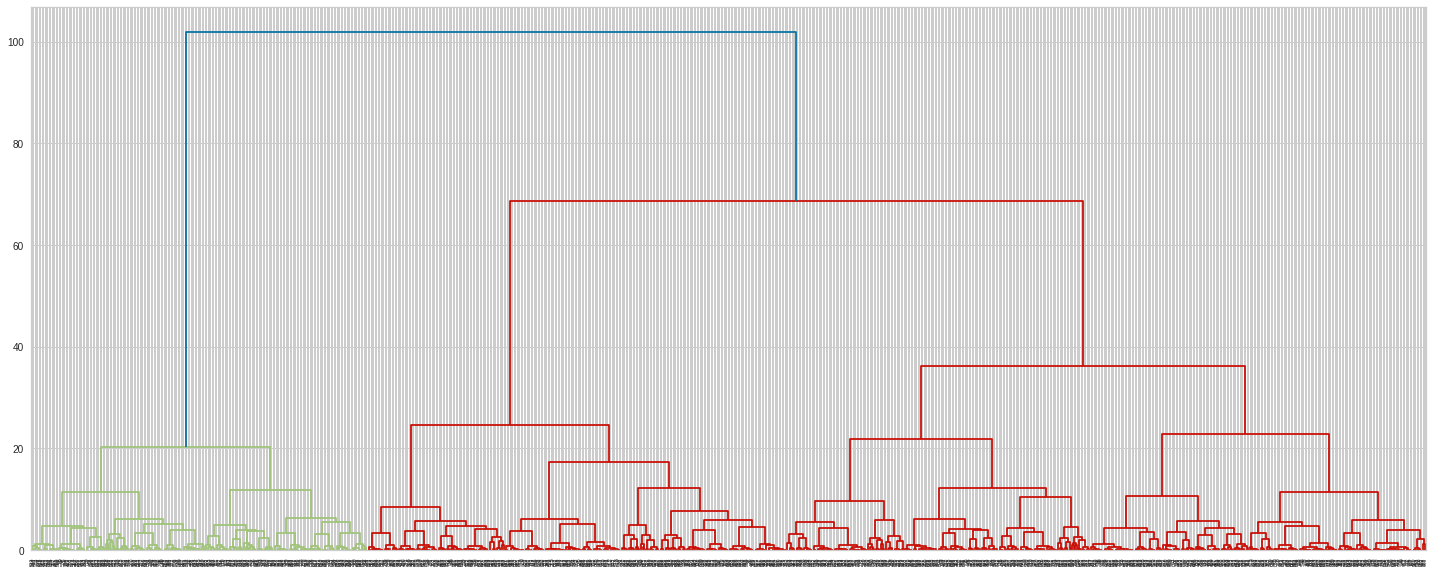

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data_clust, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [ ]:
#Наша интерпретация и предположение оптимального числа кластеров или диапозона
#Наибольшее расстояние наблюдается при делении выборки на 2 кластера
#Однако видно, что кластеры выходят неоднородными

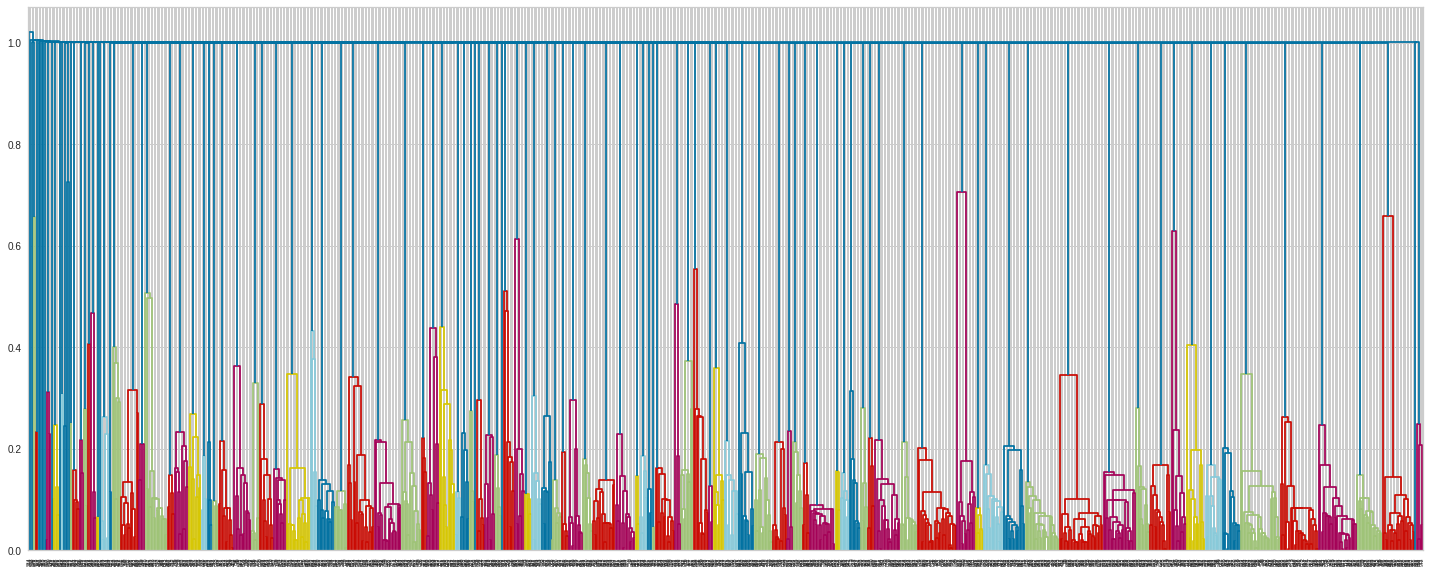

In [ ]:
Z = linkage(data_clust, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [ ]:
#Сложно определить диапозон 

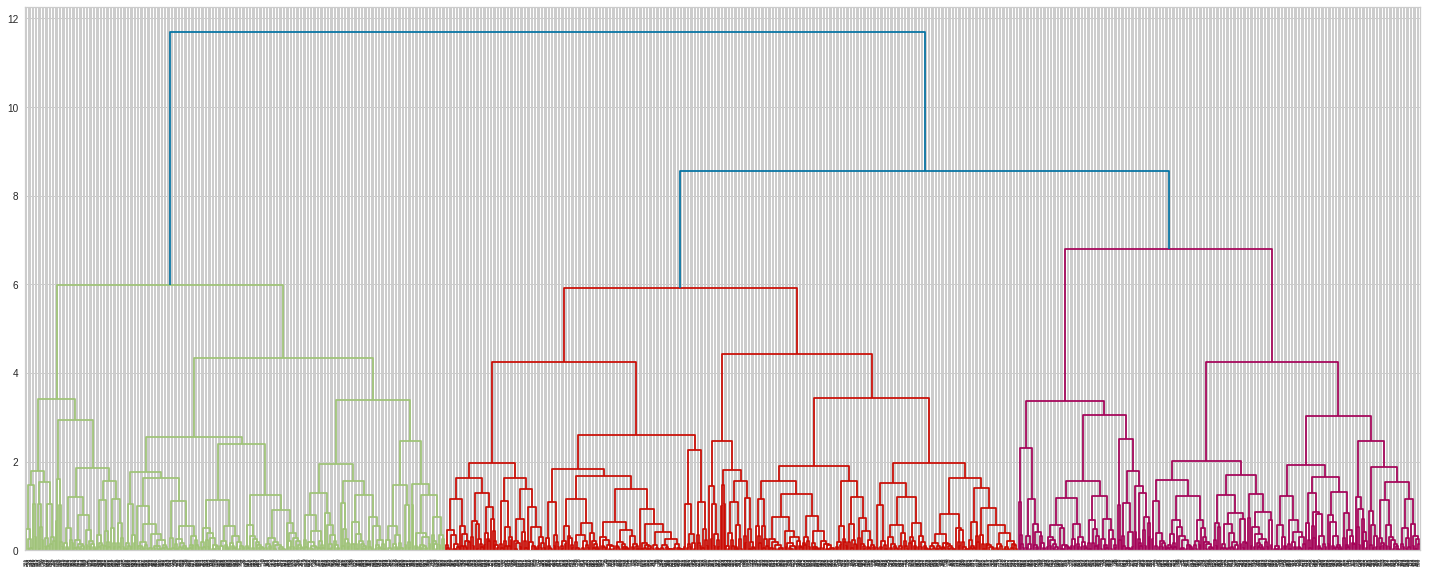

In [ ]:
Z = linkage(data_clust, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [ ]:
#Наблюдаются два кластера

In [ ]:
#В итоге, выбираем два кластера по иерархической кластеризации. Для улучшения результата проверим еще метод силуэтов

Среднее значение силуэта для 2 кластеров: 0.48


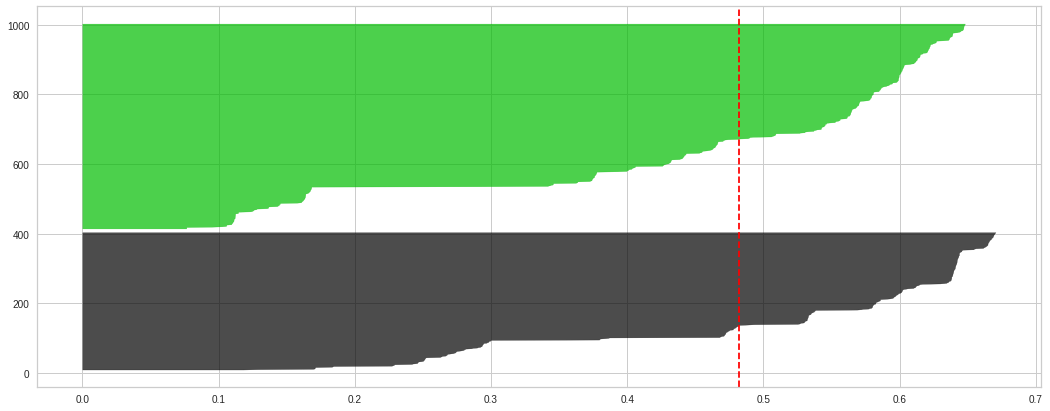

In [ ]:
from matplotlib import cm
from sklearn.metrics import silhouette_score, silhouette_samples

fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)


clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(data_clust)

silhouette_avg = silhouette_score(data_clust, cluster_labels)
print("Среднее значение силуэта для 2 кластеров:", round(silhouette_avg,2))

sample_silhouette_values = silhouette_samples(data_clust, cluster_labels)

y_lower = 10
for i in range(0, 2):
    ith_cluster_silhouette_values = \
         sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 2)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

Среднее значение силуэта для 3 кластеров: 0.4


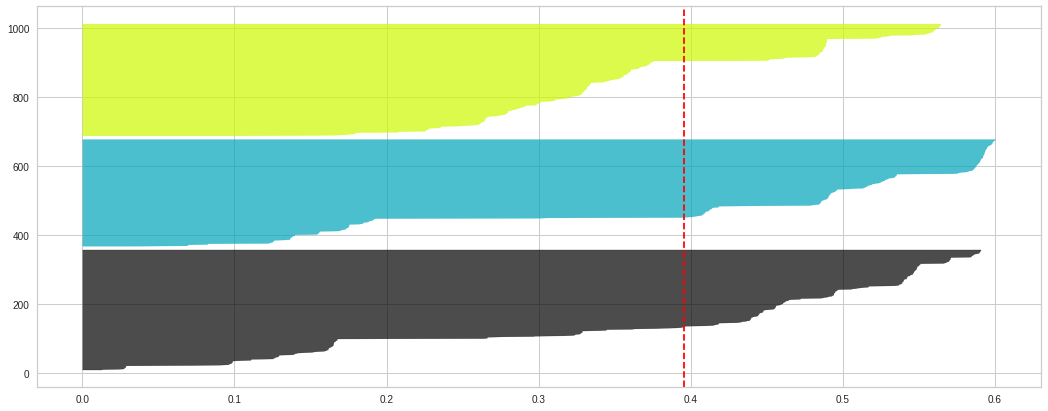

In [ ]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)


clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(data_clust)

silhouette_avg = silhouette_score(data_clust, cluster_labels)
print("Среднее значение силуэта для 3 кластеров:", round(silhouette_avg,2))

sample_silhouette_values = silhouette_samples(data_clust, cluster_labels)

y_lower = 10
for i in range(0, 3):
    ith_cluster_silhouette_values = \
         sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

Среднее значение силуэта для 4 кластеров: 0.39


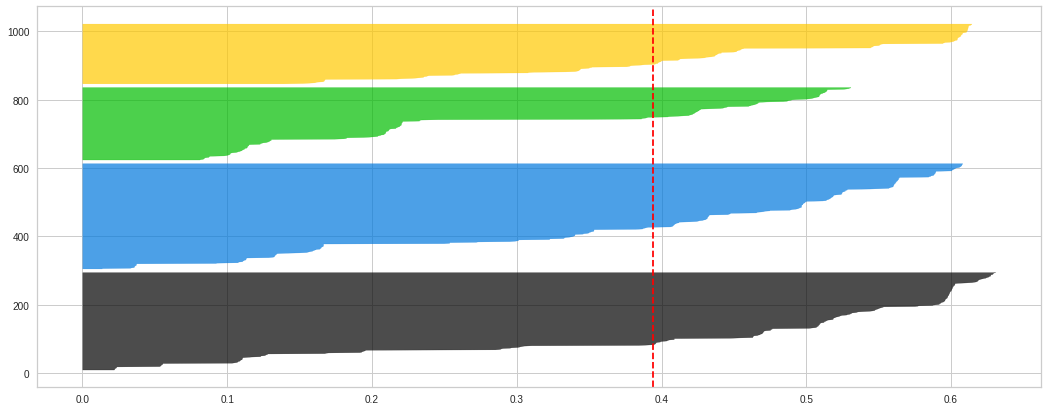

In [ ]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)


clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(data_clust)

silhouette_avg = silhouette_score(data_clust, cluster_labels)
print("Среднее значение силуэта для 4 кластеров:", round(silhouette_avg,2))

sample_silhouette_values = silhouette_samples(data_clust, cluster_labels)

y_lower = 10
for i in range(0, 4):
    ith_cluster_silhouette_values = \
         sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 4)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

Среднее значение силуэта для 5 кластеров: 0.36


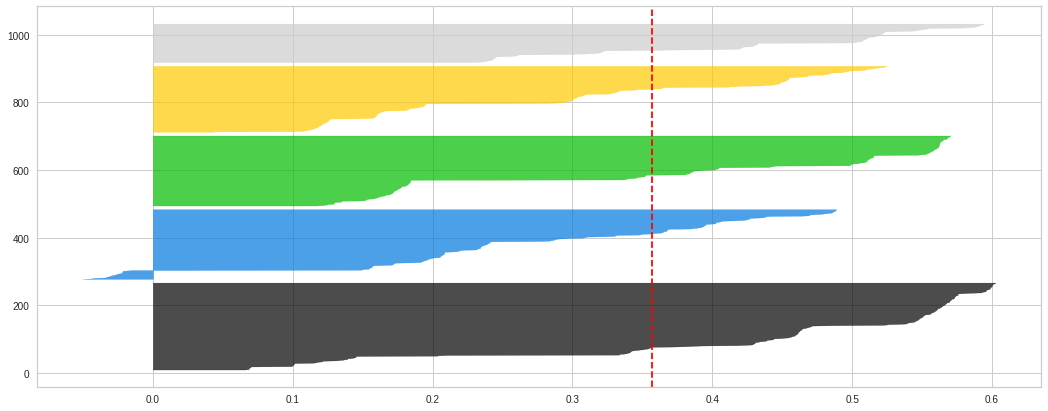

In [ ]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)


clusterer = KMeans(n_clusters=5, random_state=10)
cluster_labels = clusterer.fit_predict(data_clust)

silhouette_avg = silhouette_score(data_clust, cluster_labels)
print("Среднее значение силуэта для 5 кластеров:", round(silhouette_avg,2))

sample_silhouette_values = silhouette_samples(data_clust, cluster_labels)

y_lower = 10
for i in range(0, 5):
    ith_cluster_silhouette_values = \
         sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 4)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

Среднее значение силуэта для 6 кластеров: 0.34


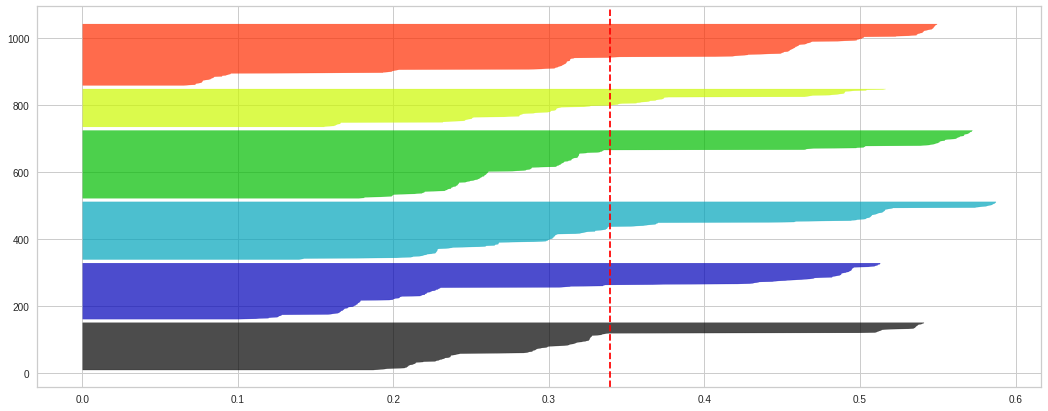

In [ ]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)


clusterer = KMeans(n_clusters=6, random_state=10)
cluster_labels = clusterer.fit_predict(data_clust)

silhouette_avg = silhouette_score(data_clust, cluster_labels)
print("Среднее значение силуэта для 6 кластеров:", round(silhouette_avg,2))

sample_silhouette_values = silhouette_samples(data_clust, cluster_labels)

y_lower = 10
for i in range(0, 6):
    ith_cluster_silhouette_values = \
         sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 6)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

Среднее значение силуэта для 7 кластеров: 0.33


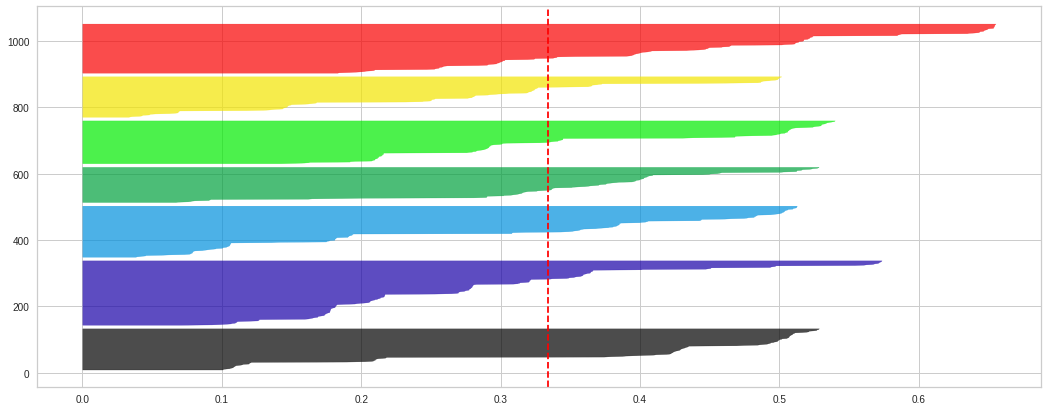

In [ ]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)


clusterer = KMeans(n_clusters=7, random_state=10)
cluster_labels = clusterer.fit_predict(data_clust)

silhouette_avg = silhouette_score(data_clust, cluster_labels)
print("Среднее значение силуэта для 7 кластеров:", round(silhouette_avg,2))

sample_silhouette_values = silhouette_samples(data_clust, cluster_labels)

y_lower = 10
for i in range(0, 7):
    ith_cluster_silhouette_values = \
         sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 7)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

Среднее значение силуэта для 8 кластеров: 0.33


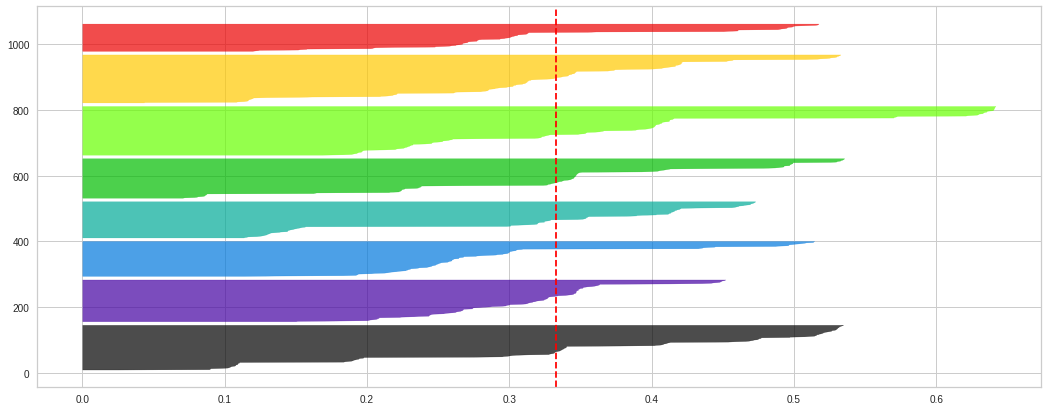

In [ ]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)


clusterer = KMeans(n_clusters=8, random_state=10)
cluster_labels = clusterer.fit_predict(data_clust)

silhouette_avg = silhouette_score(data_clust, cluster_labels)
print("Среднее значение силуэта для 8 кластеров:", round(silhouette_avg,2))

sample_silhouette_values = silhouette_samples(data_clust, cluster_labels)

y_lower = 10
for i in range(0, 8):
    ith_cluster_silhouette_values = \
         sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 8)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

Среднее значение силуэта для 9 кластеров: 0.34


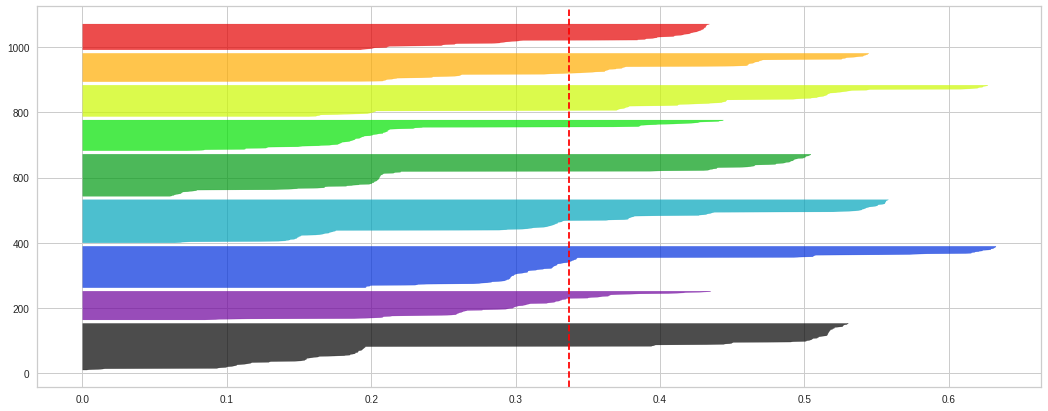

In [ ]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)


clusterer = KMeans(n_clusters=9, random_state=10)
cluster_labels = clusterer.fit_predict(data_clust)

silhouette_avg = silhouette_score(data_clust, cluster_labels)
print("Среднее значение силуэта для 9 кластеров:", round(silhouette_avg,2))

sample_silhouette_values = silhouette_samples(data_clust, cluster_labels)

y_lower = 10
for i in range(0, 9):
    ith_cluster_silhouette_values = \
         sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 9)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

Среднее значение силуэта для 10 кластеров: 0.34


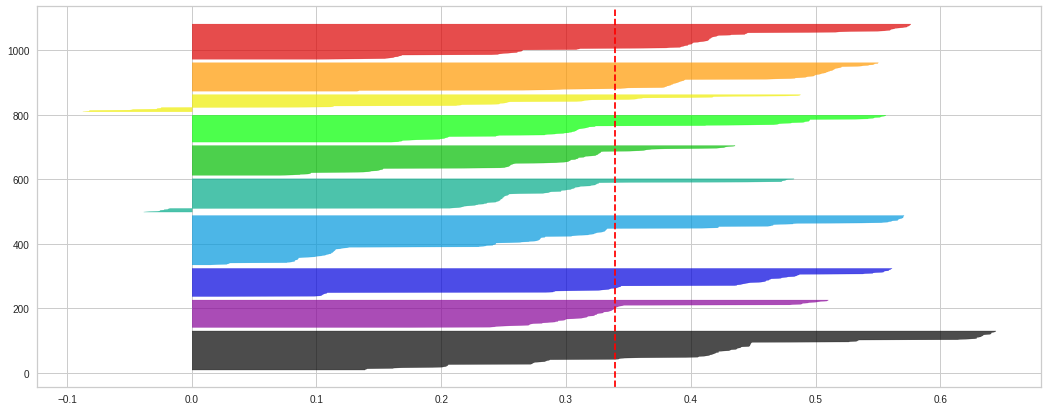

In [ ]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)


clusterer = KMeans(n_clusters=10, random_state=10)
cluster_labels = clusterer.fit_predict(data_clust)

silhouette_avg = silhouette_score(data_clust, cluster_labels)
print("Среднее значение силуэта для 10 кластеров:", round(silhouette_avg,2))

sample_silhouette_values = silhouette_samples(data_clust, cluster_labels)

y_lower = 10
for i in range(0, 10):
    ith_cluster_silhouette_values = \
         sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 10)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

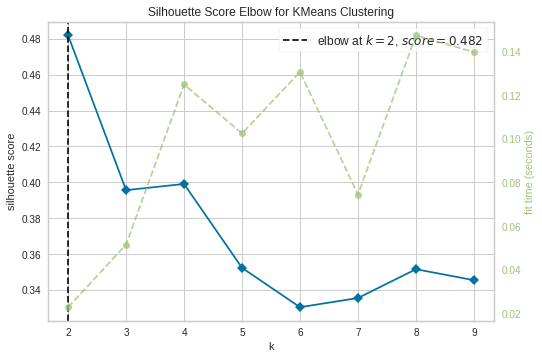

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(data_clust)
visualizer.show()
plt.show()

In [ ]:
#Оптимальным количеством будет два кластера, т.к. коэффциент силуэтов именно в этом случае максимален и равен 0.48 (неидеальное разбиение!). В заключении, все рассмотренные нами методы показали, что опитмальным будет разбиение выборки на 2 кластера

### Кластеризация k-means

In [ ]:
KM_2_clusters = KMeans(n_clusters=2, init='k-means++').fit(data_clust)

KM2_clustered = data_clust.copy()
KM2_clustered.loc[:,'Cluster'] = KM_2_clusters.labels_ 

In [ ]:
KM_2_clusters.cluster_centers_

array([[0.31353503, 0.272796  , 2.83870968, 0.20543294, 7.20203735],
       [0.32313758, 0.31927078, 2.59746835, 0.49113924, 2.05822785]])

In [ ]:
# Описание кластеров: В нулевом кластере наблюдается меньшее расстояние до работы и количество увольнений в следующем году, но больший уровень образования и интерес к работе + незначительно меньший опыт работы, чем в первом кластере, что говорит о том, что работников нулевого класса можно определить эффективными, а первого неэффективными

In [ ]:
# Ваш код: график средних
'work_exp', 'dist','educ', 'target','interest'


('work_exp', 'dist', 'educ', 'target', 'interest')

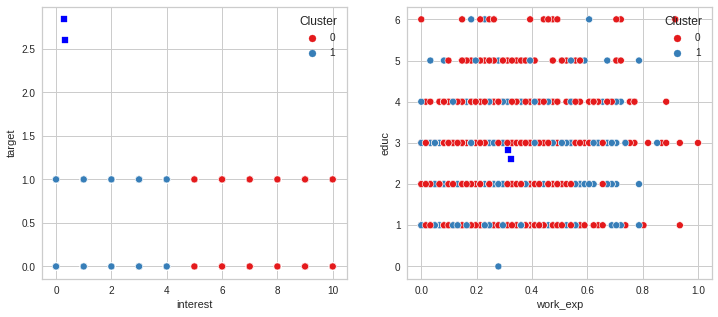

In [ ]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('interest', 'target', data=KM2_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('work_exp', 'educ', data=KM2_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_2_clusters.cluster_centers_[:,1],KM_2_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_2_clusters.cluster_centers_[:,0],KM_2_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [ ]:
KM_clust_sizes = KM2_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,589
1,395


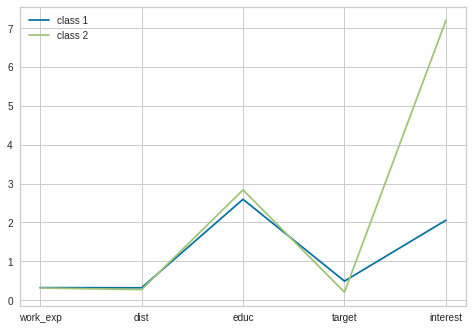

In [ ]:
import matplotlib.pyplot as plt
cl1 = [ 0.32313758, 0.31927078, 2.59746835, 0.49113924, 2.05822785]
cl2 = [ 0.31353503, 0.272796  , 2.83870968, 0.20543294, 7.20203735]   
columns = ['work_exp', 'dist','educ', 'target','interest']
  
# plot lines
plt.plot(columns, cl1, label = "class 1")
plt.plot(columns, cl2, label = "class 2")
plt.legend()
plt.show()

In [ ]:
#Определим наши кластеры: "0"-эффеективный работник "1"-неэффективный
#Стоит отметить, что стаж работы в обоих кластерах примерно одинаков 

In [ ]:
# Интерпретация графика средних. Выбор и обоснование предпочтительной нормировки

Переменные стажа работы и отдаленности оказались незначимыми для разделения выборки. Уровень образования и факт увольнения в последующий год различаются по среднему значению для двух кластеров, однако основное разделение произолшло по переменной интереса. Для исходных 5 переменных за оценку меры эффективности можно принять, главным образом, оценку заинтересованности в работе.



# Кластеризация DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(data_clust)

In [ ]:
# Подобрать такие значения eps и min_samples, чтобы число кластеров = числу выбранных кластеров
# в кластеризации к-средних

db = DBSCAN(eps=1.00005, min_samples=28).fit(data_clust)
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

2

In [ ]:
db.core_sample_indices_

array([  7,  18,  22,  28,  30,  32,  48,  49,  58,  63,  76,  78,  92,
        93,  95, 101, 111, 114, 117, 118, 138, 147, 153, 155, 171, 178,
       184, 227, 237, 247, 257, 260, 278, 283, 364, 386, 431, 432, 434,
       456, 458, 460, 467, 477, 480, 488, 501, 513, 517, 536, 548, 561,
       589, 602, 604, 605, 608, 609, 635, 636, 644, 661, 663, 706, 712,
       715, 719, 726, 733, 735, 737, 739, 749, 753, 762, 781, 789, 797,
       809, 816, 818, 832, 836, 839, 853, 863, 879, 901, 910, 920, 940,
       943, 966, 972, 980])

In [ ]:
# Что означают цифры в предыдущей ячейке?

In [ ]:
db.labels_

array([-1, -1,  0,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  0, -1,  0, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0,  1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1,  1, -1,  0, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,  0, -1, -1, -1, -1,
        0, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [ ]:
# Что означает класс -1 в предыдущей ячейке?

In [ ]:
# Построить график средних значений, дать экономическую интерпретацию и предложить меры 
# поддержки для каждого кластера. Сравнить с графиком средних k-means
# Выбрать наиболее удачный метод кластеризации

In [ ]:
# В итоге было замечено, что увольняются сотрудники, незаинтересованные в работе. При этом на их увольнение особо не оказывает влияние расстояние до работы, стаж и даже уровень образования. НУЖНО ПОВЫШАТЬ ЗАИНТЕРЕСОВАННОСТЬ СОТРУДНИКОВ!!!!!!!! НАДО ПРОВЕСТИ  ДОПОЛНИТЕЛЬНЫЕ ИССЛЕДОВАНИЯ С ИЗУЧЕНИЯМИ КОРРЕЛЯЦИИ ЗАИНТЕРЕСОВАННОСТИ И ДРУГИХ ПАРАМЕТРОВ